## Exploratory Data Analysis on Customer Bookings data for British Airways

In [133]:
# import 
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
#get current work directory

cwd = os.getcwd()

#read the csv
df = pd.read_csv(cwd + "/customer_booking.csv", encoding="ISO-8859-1")

In [135]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [136]:
df.shape

(50000, 14)

In [137]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

## Sales Channel

In [139]:
per_internet = df.sales_channel.value_counts().values[0] / df.sales_channel.count()*100
per_mobile = df.sales_channel.value_counts().values[1] / df.sales_channel.count()*100

In [140]:
print(f"Number of booking done through internet: {per_internet} %")
print(f"Number of booking done through phone call: {per_mobile} %")

Number of booking done through internet: 88.764 %
Number of booking done through phone call: 11.236 %


## Trip Type

In [141]:
per_round = df.trip_type.value_counts().values[0]/df.trip_type.count()*100
per_oneway = df.trip_type.value_counts().values[0]/df.trip_type.count()*100
per_circle = df.trip_type.value_counts().values[0]/df.trip_type.count()*100

In [142]:
print(f"Percentage of Round Trips: {per_round} %") 
print(f"Percentage of One Way Trip: {per_oneway} %")
print(f"Percentage of One Circle Trip : {per_oneway} %")

Percentage of Round Trips: 98.994 %
Percentage of One Way Trip: 98.994 %
Percentage of One Circle Trip : 98.994 %


## Purchased Lead

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


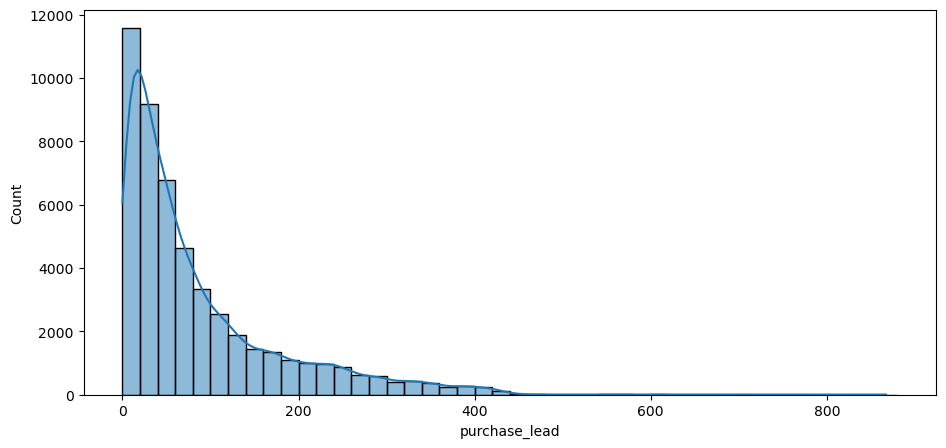

In [143]:
plt.figure(figsize=(11, 5))
sns.histplot(data=df, x="purchase_lead", binwidth=20, kde=True);

There are few bookings that were done more than 2 years before the travel date and it seems very unlikely that book that in advance. However, it might also be because of the cancellation and rebooking in a period of 6 months for twice. Generally airline keep the tickets for rebooking within a year. But at this point we will consider them as outliers which will effect the results of predictive model in a huge way.



In [144]:
(df.purchase_lead > 600).value_counts()

purchase_lead
False    49992
True         8
Name: count, dtype: int64

If we assume that no customer is booking in advance of more than 1 and half year we will remove all entries with purchase_lead more than 600 days.



In [145]:
df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,Sat,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,Fri,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,Thu,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,Fri,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,Mon,KIXMLE,Japan,0,0,1,7.00,1


In [146]:
#filtering the data to have only purchase lead days less than 600 days
df = df[df.purchase_lead < 600]

## Length Of Stay

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


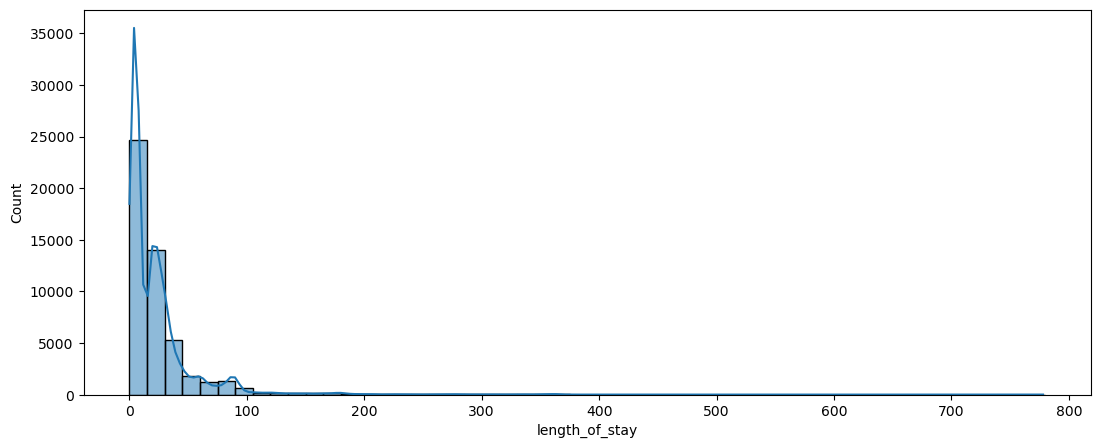

In [147]:
plt.figure(figsize=(13,5))
sns.histplot(data=df, x="length_of_stay", binwidth=15,kde=True);

Let's see how many entries do we have that exceeds length of stay more than 100 days.



In [148]:
(df.length_of_stay> 200).value_counts()

length_of_stay
False    49713
True       279
Name: count, dtype: int64

In [149]:
df[df.length_of_stay> 500].booking_complete.value_counts()

booking_complete
0    9
1    1
Name: count, dtype: int64

We need to have more business knowledge to decide whether to remove these entries with more than 600 days of stay. There are could be many reasons for such bookings. But for now, we will just want to focus on bookings done for length of stay less than 500 days.



In [150]:
#filtering the data to have only length of  stay days less than 500 days
df = df[df.purchase_lead < 500]

## Flight Day
we will map the flight day with a number of a week

In [151]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.flight_day = df.flight_day.map(mapping)

In [152]:
df.flight_day.value_counts()


flight_day
1    8100
3    7671
2    7670
4    7423
5    6759
7    6550
6    5809
Name: count, dtype: int64

Most of the customers want to travel on Monday and choose Saturday as least preffered day as flight day.




## Booking Origin

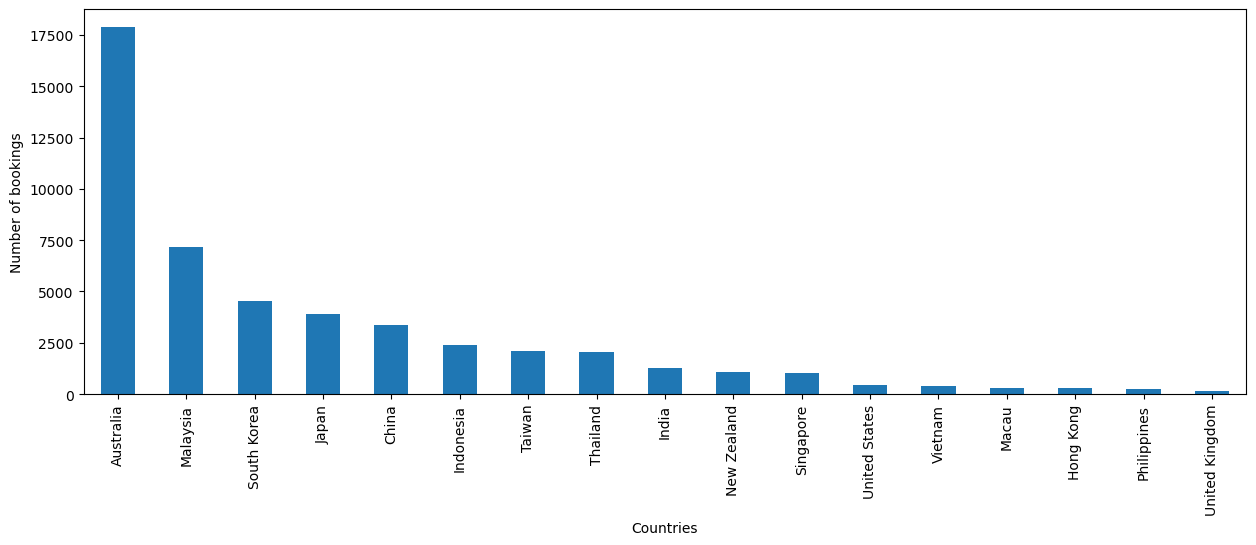

In [153]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:17].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings");

Above chart shows travellers from which country had maximum booking applications.



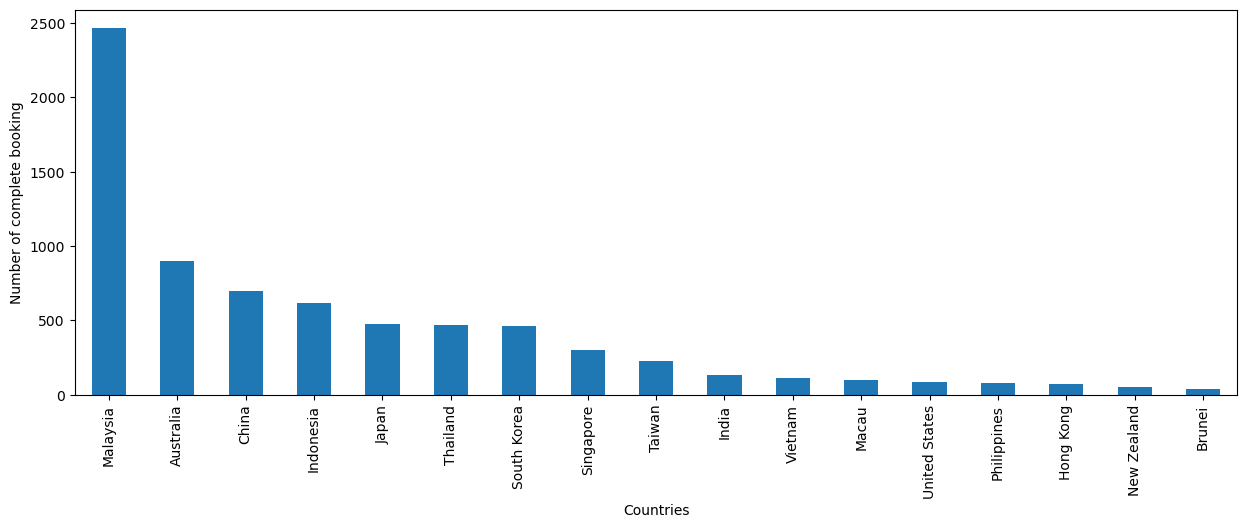

In [154]:
plt.figure(figsize=(15,5))
ax= df[df.booking_complete==1].booking_origin.value_counts()[:17].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete booking");

Above chart shows travellers from which country had their booking complete.



## Booking Complete

In [155]:
successful_booking_per = df.booking_complete.value_counts().values[0]/len(df)*100

In [156]:
unsuccessful_booking_per = 100-successful_booking_per

In [157]:
print(f"Out of 50000 booking entries only {round(unsuccessful_booking_per,2)} % booking were successful or complete.")

Out of 50000 booking entries only 14.96 % booking were successful or complete.


## Export the dataset to csv

In [158]:
df.to_csv(cwd +"/filtered_customer_booking.csv")